In [23]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISIBLE_DEVICES=2


In [24]:
%matplotlib inline

In [10]:
from importlib import reload
import medvqa

# Predicting bboxes of anatomical regions on MIMIC-CXR images

In [41]:
# reload(medvqa.evaluation.plots)
reload(medvqa.models.model_debugging_utils)
reload(medvqa.models.vision.visual_modules)

<module 'medvqa.models.vision.visual_modules' from '/home/pamessina/medvqa/medvqa/models/vision/visual_modules.py'>

In [42]:
from medvqa.models.model_debugging_utils import visualize_yolov8_predictions

In [28]:
from medvqa.datasets.chest_imagenome import (
    CHEST_IMAGENOME_NUM_BBOX_CLASSES,
    CHEST_IMAGENOME_BBOX_NAMES,
)

Overriding model.yaml nc=80 with nc=36

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

checkpoint_names = ['checkpoint_79_chou+chuc+chuc+chuc+chuc+cD+gacc+wmmp=0.6677.pt', 'checkpoint_135_chou+chuc+chuc+chuc+chuc+cD+gacc+wmmp=0.6689.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230428_223926_mim_Image2ReportModel(yolov8l->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))/checkpoint_135_chou+chuc+chuc+chuc+chuc+cD+gacc+wmmp=0.6689.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/mimic-cxr-jpg/images-medium(512)/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230428_223926_mim_Image2ReportModel(yolov8l->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'for_yolov8': True}}
get_image_transform()
  Using bounding box aware tran

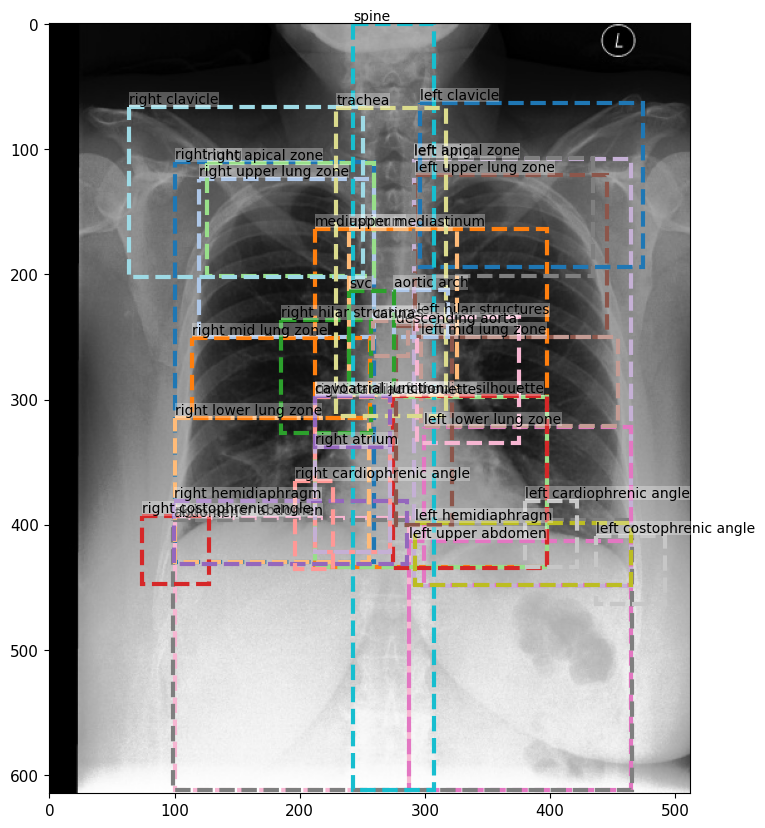

In [29]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230428_223926_mim_Image2ReportModel(yolov8l->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))/',
    num_classes=CHEST_IMAGENOME_NUM_BBOX_CLASSES,
    class_names=CHEST_IMAGENOME_BBOX_NAMES,
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/mimic-cxr-jpg/images-medium(512)/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    conf_thres=0.1, iou_thres=0.1
)

In [30]:
tmp = [['a', 'b'], ['c', 'd']]
[item for sublist in tmp for item in sublist]

['a', 'b', 'c', 'd']

# Predicting bboxes for MIMIC-CXR + VinDr-CXR

#### naive merge

Overriding model.yaml nc=80 with nc=58

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

checkpoint_names = ['checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.6584.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230607_175334_mim+vinbig_yolov8l_dws=1.0,0.8/checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.6584.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/mimic-cxr-jpg/images-medium(512)/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230607_175334_mim+vinbig_yolov8l_dws=1.0,0.8/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yo

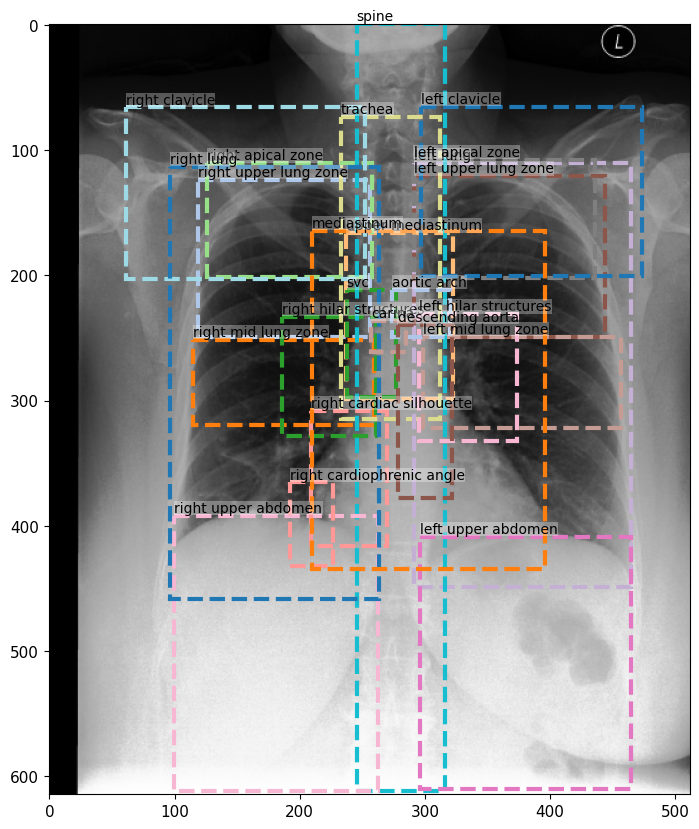

In [26]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230607_175334_mim+vinbig_yolov8l_dws=1.0,0.8/',
    num_classes=CHEST_IMAGENOME_NUM_BBOX_CLASSES + len(VINBIG_BBOX_NAMES),
    class_names=CHEST_IMAGENOME_BBOX_NAMES + VINBIG_BBOX_NAMES,
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/mimic-cxr-jpg/images-medium(512)/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    conf_thres=0.1, iou_thres=0.1
)

Overriding model.yaml nc=80 with nc=58

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

checkpoint_names = ['checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.6584.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230607_175334_mim+vinbig_yolov8l_dws=1.0,0.8/checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.6584.pt
Checkpoint successfully loaded!
image_path = //mnt/workspace/vinbig-cxr/dataset-jpg/images/4f737958fc5a7d9805f4a94f70cfc5a2.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230607_175334_mim+vinbig_yolov8l_dws=1.0,0.8/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True}, 'vinbig': {'image_size':

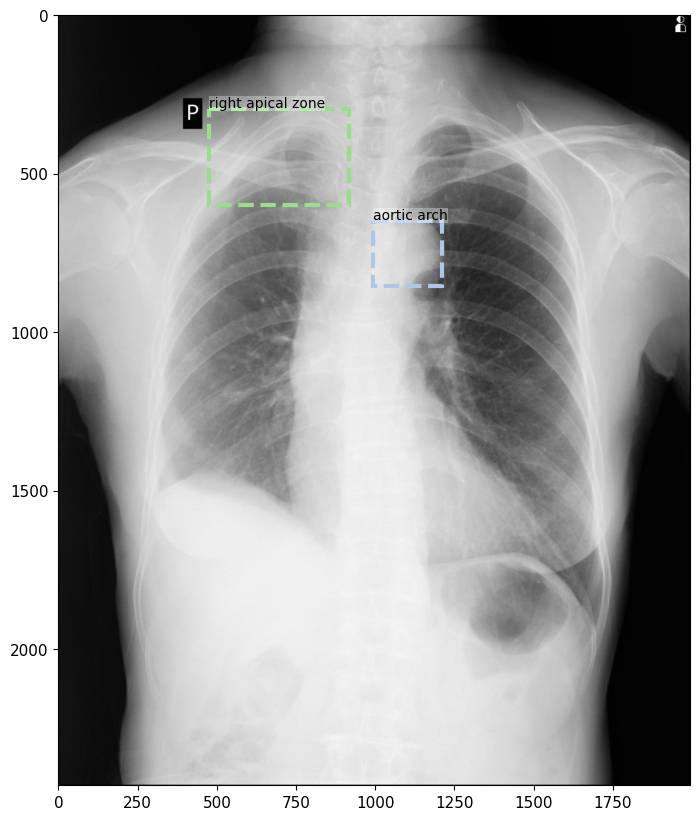

In [27]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230607_175334_mim+vinbig_yolov8l_dws=1.0,0.8/',
    num_classes=CHEST_IMAGENOME_NUM_BBOX_CLASSES + len(VINBIG_BBOX_NAMES),
    class_names=CHEST_IMAGENOME_BBOX_NAMES + VINBIG_BBOX_NAMES,
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='//mnt/workspace/vinbig-cxr/dataset-jpg/images/4f737958fc5a7d9805f4a94f70cfc5a2.jpg',
    conf_thres=0.1, iou_thres=0.1
)

#### two forwards (vinbig: test in train)

Overriding model.yaml nc=80 with nc=36


Creating YOLOv8 model for multiple datasets


Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=22
Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=36
Transferred 510/510 items from pretrained weights


checkpoint_names = ['checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt
Checkpoint successfully loaded!
image_path = //mnt/workspace/vinbig-cxr/dataset-jpg/images/4f737958fc5a7d9805f4a94f70cfc5a2.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True}, 'vinbig': {'image_size':

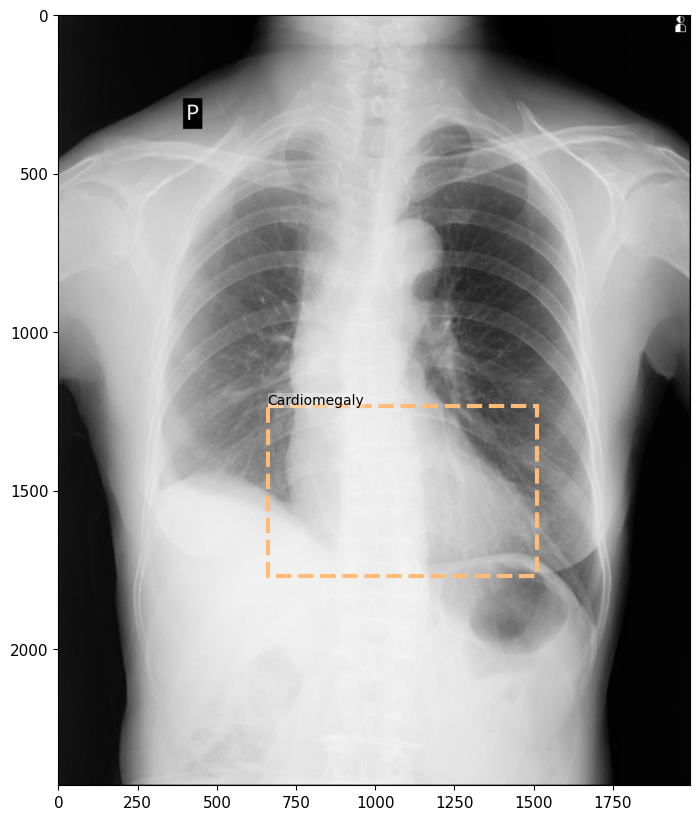

In [43]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/',
    num_classes=[CHEST_IMAGENOME_NUM_BBOX_CLASSES, len(VINBIG_BBOX_NAMES)],
    class_names=[CHEST_IMAGENOME_BBOX_NAMES, VINBIG_BBOX_NAMES],
    detection_layer_indexes = [1],
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/4f737958fc5a7d9805f4a94f70cfc5a2.jpg',
    conf_thres=0.1, iou_thres=0.1,
    verbose=False,
)

Overriding model.yaml nc=80 with nc=36


Creating YOLOv8 model for multiple datasets


Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=22
Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=36
Transferred 510/510 items from pretrained weights


checkpoint_names = ['checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/8de301615cf3fca4c747a87d9b9505c1.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True}, 'vinbig': {'image_size': 

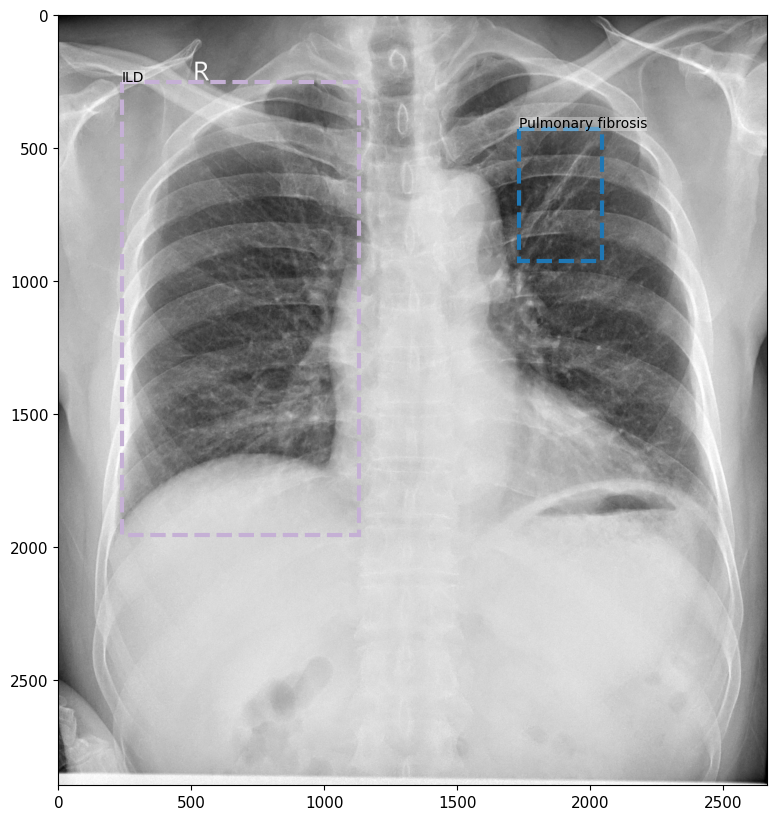

In [44]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/',
    num_classes=[CHEST_IMAGENOME_NUM_BBOX_CLASSES, len(VINBIG_BBOX_NAMES)],
    class_names=[CHEST_IMAGENOME_BBOX_NAMES, VINBIG_BBOX_NAMES],
    detection_layer_indexes = [1],
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/8de301615cf3fca4c747a87d9b9505c1.jpg',
    conf_thres=0.1, iou_thres=0.1,
    verbose=False,
)

Overriding model.yaml nc=80 with nc=36


Creating YOLOv8 model for multiple datasets


Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=22
Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=36
Transferred 510/510 items from pretrained weights


checkpoint_names = ['checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/706814b8f626ce46d5614029ec51dc44.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True}, 'vinbig': {'image_size': 

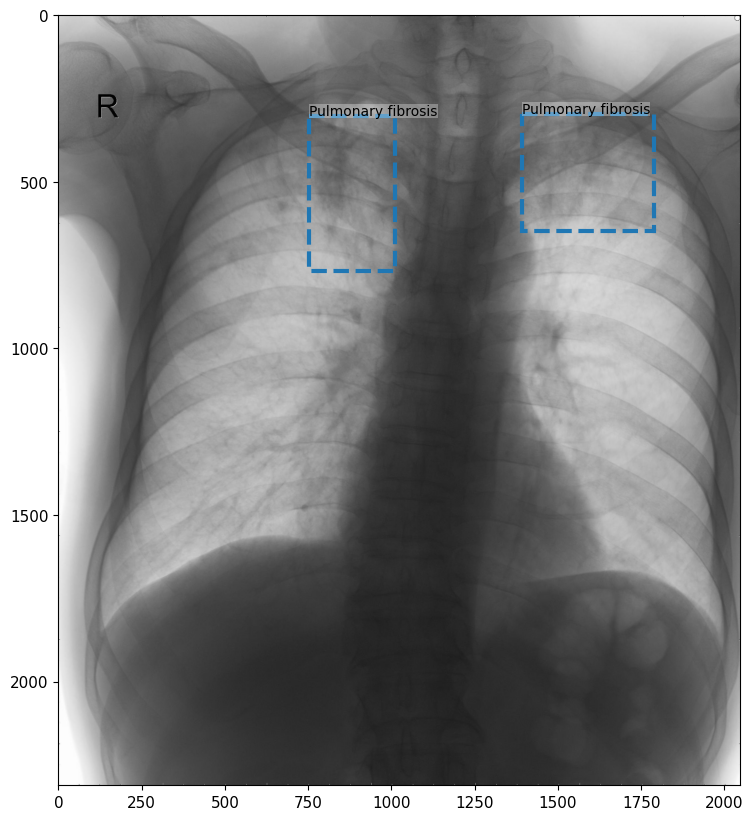

In [53]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/',
    num_classes=[CHEST_IMAGENOME_NUM_BBOX_CLASSES, len(VINBIG_BBOX_NAMES)],
    class_names=[CHEST_IMAGENOME_BBOX_NAMES, VINBIG_BBOX_NAMES],
    detection_layer_indexes = [1],
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/706814b8f626ce46d5614029ec51dc44.jpg',
    conf_thres=0.1, iou_thres=0.1,
    verbose=False,
)

Overriding model.yaml nc=80 with nc=36


Creating YOLOv8 model for multiple datasets


Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=22
Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=36
Transferred 510/510 items from pretrained weights


checkpoint_names = ['checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/9c91dd728f43b2c18c80674c11321fb4.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True}, 'vinbig': {'image_size': 

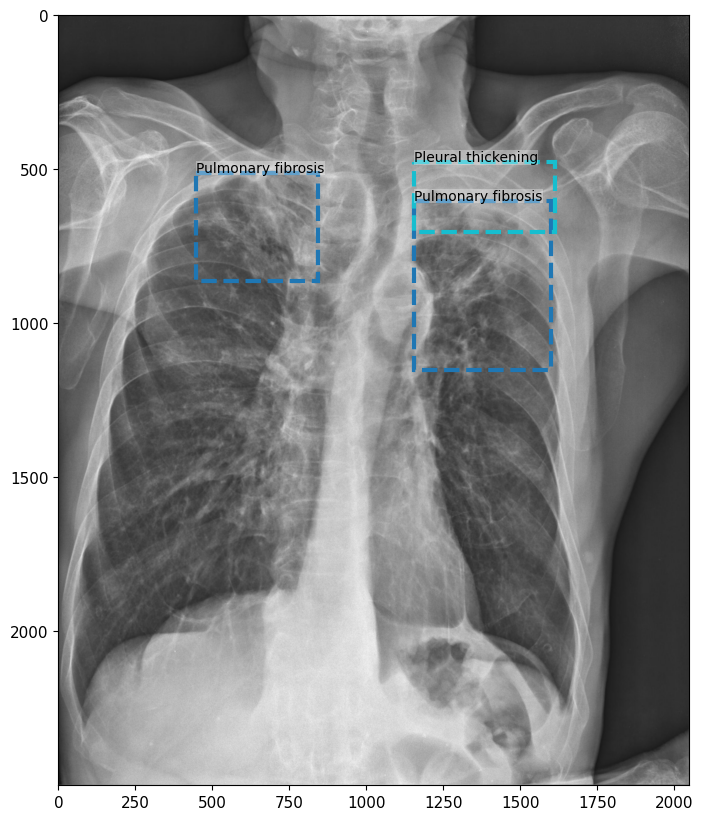

In [54]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/',
    num_classes=[CHEST_IMAGENOME_NUM_BBOX_CLASSES, len(VINBIG_BBOX_NAMES)],
    class_names=[CHEST_IMAGENOME_BBOX_NAMES, VINBIG_BBOX_NAMES],
    detection_layer_indexes = [1],
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/9c91dd728f43b2c18c80674c11321fb4.jpg',
    conf_thres=0.1, iou_thres=0.1,
    verbose=False,
)

Overriding model.yaml nc=80 with nc=36


Creating YOLOv8 model for multiple datasets


Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=22
Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=36
Transferred 510/510 items from pretrained weights


checkpoint_names = ['checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/8de301615cf3fca4c747a87d9b9505c1.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True}, 'vinbig': {'image_size': 

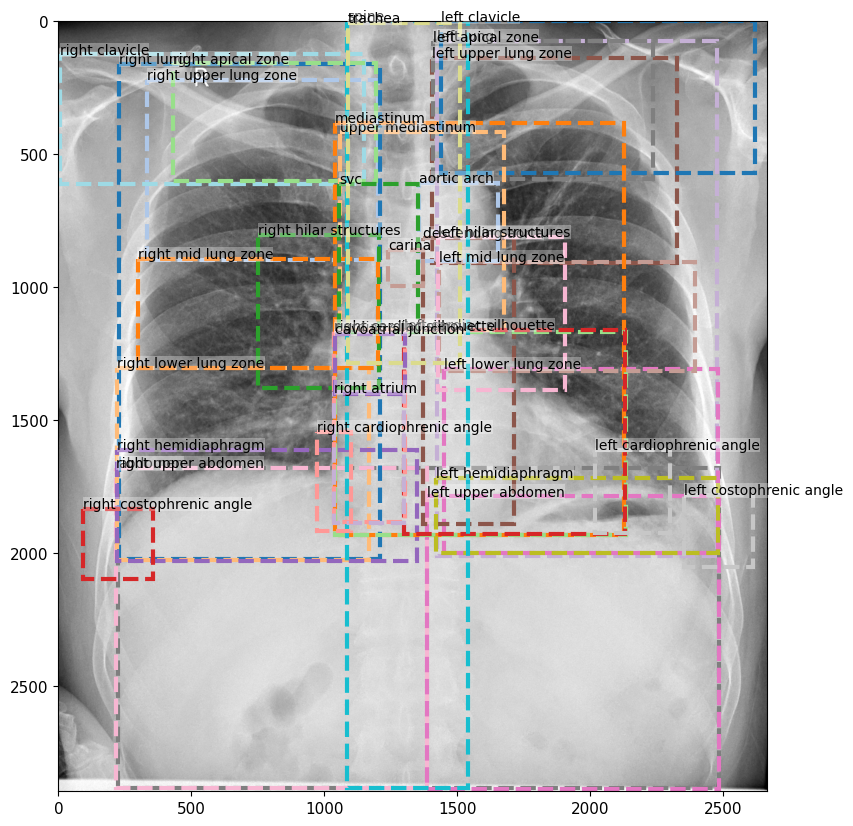

In [45]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/',
    num_classes=[CHEST_IMAGENOME_NUM_BBOX_CLASSES, len(VINBIG_BBOX_NAMES)],
    class_names=[CHEST_IMAGENOME_BBOX_NAMES, VINBIG_BBOX_NAMES],
    detection_layer_indexes = [0],
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/8de301615cf3fca4c747a87d9b9505c1.jpg',
    conf_thres=0.1, iou_thres=0.1,
    verbose=False,
)

Overriding model.yaml nc=80 with nc=36


Creating YOLOv8 model for multiple datasets


Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=22
Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=36
Transferred 510/510 items from pretrained weights


checkpoint_names = ['checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt
Checkpoint successfully loaded!
image_path = /mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True}, 'vi

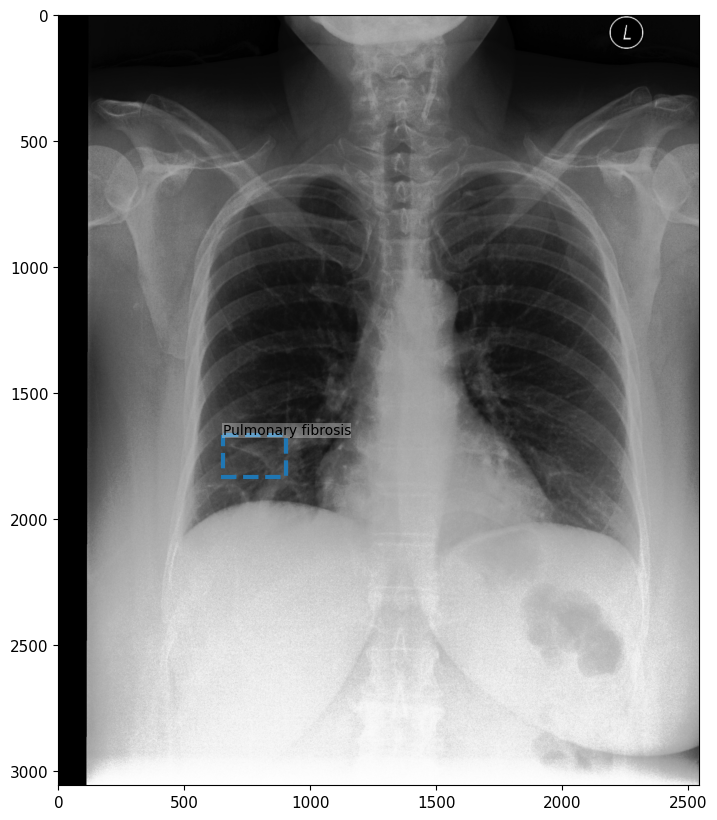

In [46]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/',
    num_classes=[CHEST_IMAGENOME_NUM_BBOX_CLASSES, len(VINBIG_BBOX_NAMES)],
    class_names=[CHEST_IMAGENOME_BBOX_NAMES, VINBIG_BBOX_NAMES],
    detection_layer_indexes = [1],
    image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    conf_thres=0.1, iou_thres=0.1,
    verbose=False,
)

Overriding model.yaml nc=80 with nc=36


Creating YOLOv8 model for multiple datasets


Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=22
Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=36
Transferred 510/510 items from pretrained weights


checkpoint_names = ['checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.7937.pt
Checkpoint successfully loaded!
image_path = /mnt/data/mimic-cxr-jpg/images/p11/p11255133/s56454501/bd73e9ab-4b2f7118-a7484a2b-bab0778d-300ce9fb.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True}, 'vi

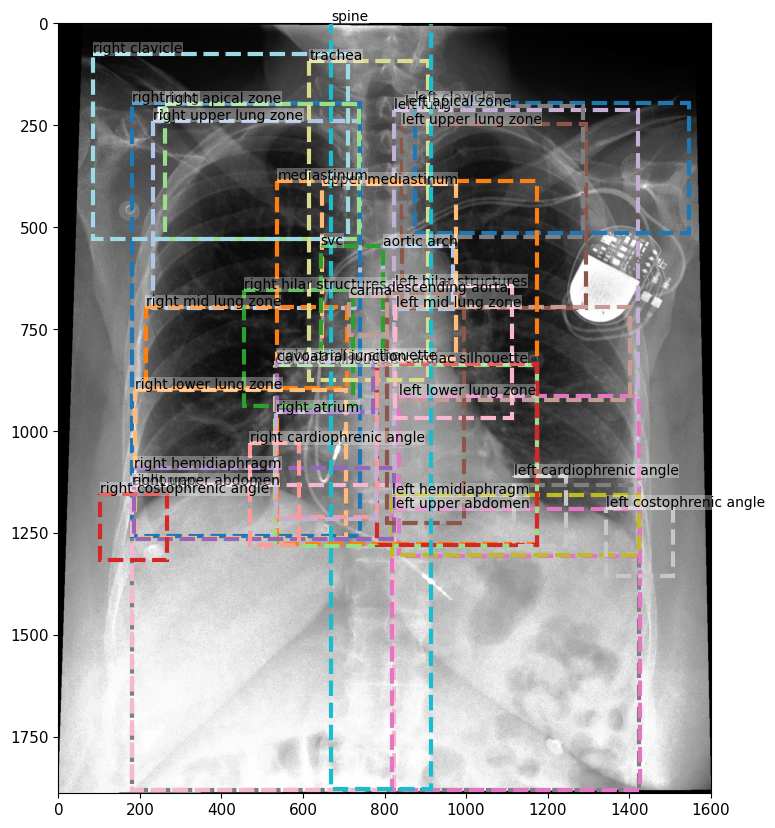

In [48]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5/',
    num_classes=[CHEST_IMAGENOME_NUM_BBOX_CLASSES, len(VINBIG_BBOX_NAMES)],
    class_names=[CHEST_IMAGENOME_BBOX_NAMES, VINBIG_BBOX_NAMES],
    detection_layer_indexes = [0],
    image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s56454501/bd73e9ab-4b2f7118-a7484a2b-bab0778d-300ce9fb.jpg',
    conf_thres=0.1, iou_thres=0.1,
    verbose=False,
)

#### two forwards (vinbig: test NOT in train)

Overriding model.yaml nc=80 with nc=36


Creating YOLOv8 model for multiple datasets


Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=22
Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=36
Transferred 510/510 items from pretrained weights


checkpoint_names = ['checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.6742.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_215137_mim+vinbig_yolov8l_dws=1.0,0.4/checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.6742.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/706814b8f626ce46d5614029ec51dc44.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_215137_mim+vinbig_yolov8l_dws=1.0,0.4/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True}, 'vinbig': {'image_size': 

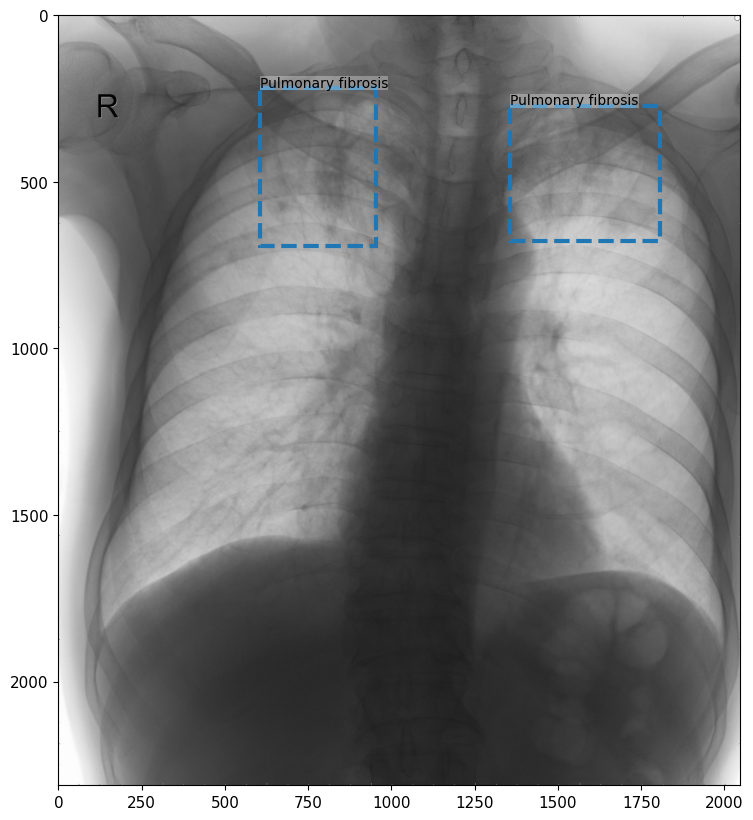

In [52]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_215137_mim+vinbig_yolov8l_dws=1.0,0.4/',
    num_classes=[CHEST_IMAGENOME_NUM_BBOX_CLASSES, len(VINBIG_BBOX_NAMES)],
    class_names=[CHEST_IMAGENOME_BBOX_NAMES, VINBIG_BBOX_NAMES],
    detection_layer_indexes = [1],
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/706814b8f626ce46d5614029ec51dc44.jpg',
    conf_thres=0.1, iou_thres=0.1,
    verbose=False,
)

Creating YOLOv8 model for multiple datasets


Overriding model.yaml nc=80 with nc=36
Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=22
Transferred 589/595 items from pretrained weights
Overriding model.yaml nc=80 with nc=36
Transferred 510/510 items from pretrained weights


checkpoint_names = ['checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.6742.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_215137_mim+vinbig_yolov8l_dws=1.0,0.4/checkpoint_60_chou+chuc+chuc+chuc+chuc+gacc+vnou+vnf1+vnuc+vnuc=0.6742.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/9c91dd728f43b2c18c80674c11321fb4.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_215137_mim+vinbig_yolov8l_dws=1.0,0.4/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True}, 'vinbig': {'image_size': 

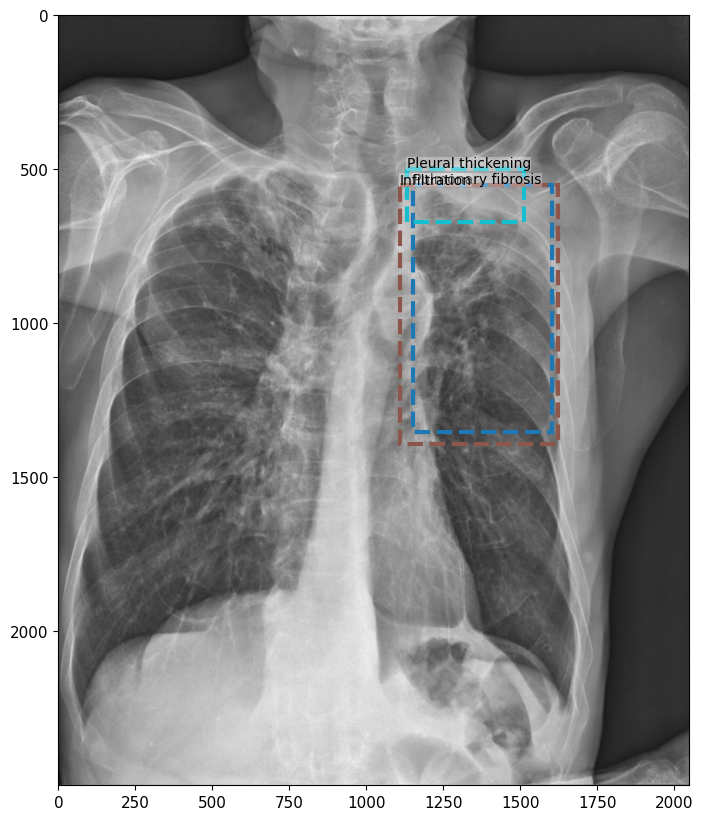

In [55]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_215137_mim+vinbig_yolov8l_dws=1.0,0.4/',
    num_classes=[CHEST_IMAGENOME_NUM_BBOX_CLASSES, len(VINBIG_BBOX_NAMES)],
    class_names=[CHEST_IMAGENOME_BBOX_NAMES, VINBIG_BBOX_NAMES],
    detection_layer_indexes = [1],
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/9c91dd728f43b2c18c80674c11321fb4.jpg',
    conf_thres=0.1, iou_thres=0.1,
    verbose=False,
)

# Predicting bboxes of anatomical regions on VinBig images

Overriding model.yaml nc=80 with nc=36

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

checkpoint_names = ['checkpoint_79_chou+chuc+chuc+chuc+chuc+cD+gacc+wmmp=0.6677.pt', 'checkpoint_135_chou+chuc+chuc+chuc+chuc+cD+gacc+wmmp=0.6689.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230428_223926_mim_Image2ReportModel(yolov8l->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))/checkpoint_135_chou+chuc+chuc+chuc+chuc+cD+gacc+wmmp=0.6689.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/4f737958fc5a7d9805f4a94f70cfc5a2.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230428_223926_mim_Image2ReportModel(yolov8l->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'for_yolov8': True}}
get_image_transform()
  Using bounding box aware transforms
    Returning default transform 

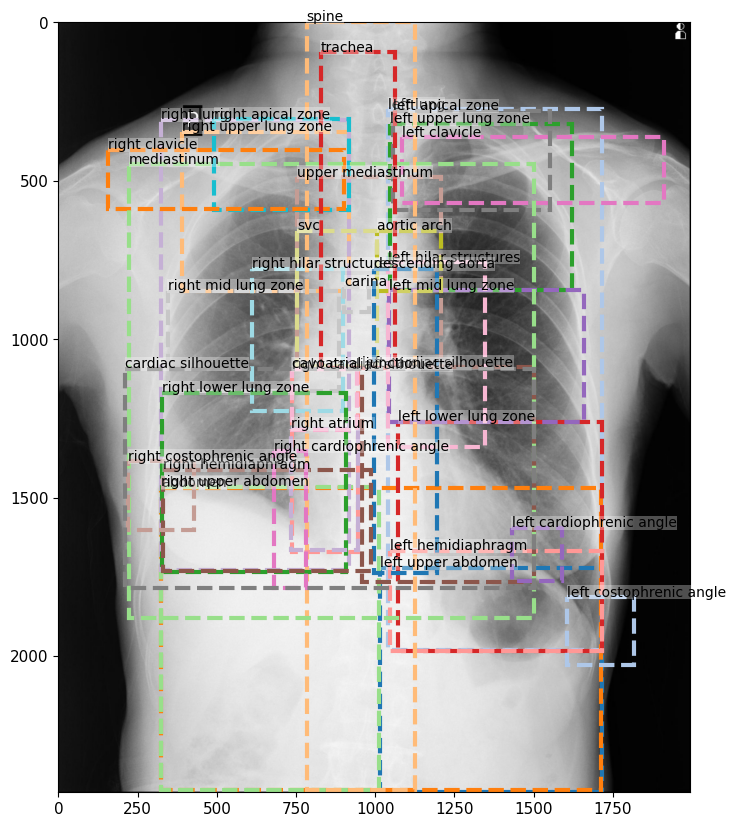

In [46]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230428_223926_mim_Image2ReportModel(yolov8l->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))/',
    num_classes=CHEST_IMAGENOME_NUM_BBOX_CLASSES,
    class_names=CHEST_IMAGENOME_BBOX_NAMES,
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/4f737958fc5a7d9805f4a94f70cfc5a2.jpg',
    conf_thres=0.1, iou_thres=0.1
)

Overriding model.yaml nc=80 with nc=36

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

checkpoint_names = ['checkpoint_79_chou+chuc+chuc+chuc+chuc+cD+gacc+wmmp=0.6677.pt', 'checkpoint_135_chou+chuc+chuc+chuc+chuc+cD+gacc+wmmp=0.6689.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230428_223926_mim_Image2ReportModel(yolov8l->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))/checkpoint_135_chou+chuc+chuc+chuc+chuc+cD+gacc+wmmp=0.6689.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/cffa67149b86b1359623d25f061a2063.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230428_223926_mim_Image2ReportModel(yolov8l->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))/metadata.json
image_transform_kwargs = {'mimic-cxr': {'image_size': [416, 416], 'augmentation_mode': None, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'for_yolov8': True}}
get_image_transform()
  Using bounding box aware transforms
    Returning default transform 

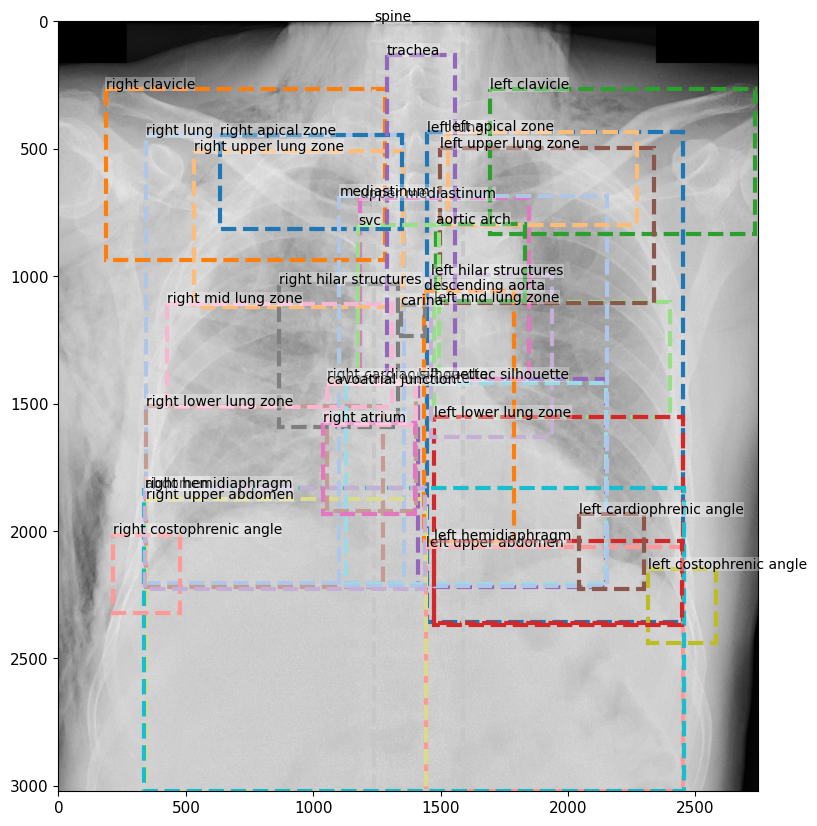

In [47]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230428_223926_mim_Image2ReportModel(yolov8l->TransfTextDec(es=512,hs=512,nl=3,nh=4,dff=512))/',
    num_classes=CHEST_IMAGENOME_NUM_BBOX_CLASSES,
    class_names=CHEST_IMAGENOME_BBOX_NAMES,
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/cffa67149b86b1359623d25f061a2063.jpg',
    conf_thres=0.1, iou_thres=0.1
)

# Predicting bboxes of abnormalities on VinBig images

In [50]:
from medvqa.datasets.vinbig import (
    VINBIG_BBOX_NAMES,
)
from medvqa.utils.constants import DATASET_NAMES

In [51]:
reload(medvqa.evaluation.plots)
reload(medvqa.models.model_debugging_utils)

<module 'medvqa.models.model_debugging_utils' from '/home/pamessina/medvqa/medvqa/models/model_debugging_utils.py'>

In [52]:
from medvqa.models.model_debugging_utils import visualize_yolov8_predictions

Overriding model.yaml nc=80 with nc=22

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

checkpoint_names = ['checkpoint_59_vnbgbbiou+vnbgbbmf1+vnbglauc+vnbgprcauc=0.9276.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_234516_vinbig_yolov8l/checkpoint_59_vnbgbbiou+vnbgbbmf1+vnbglauc+vnbgprcauc=0.9276.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/cffa67149b86b1359623d25f061a2063.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_234516_vinbig_yolov8l/metadata.json
image_transform_kwargs = {'vinbig': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True, 'for_vinbig': True}}
get_image_transform()
  Using bounding box aware transforms


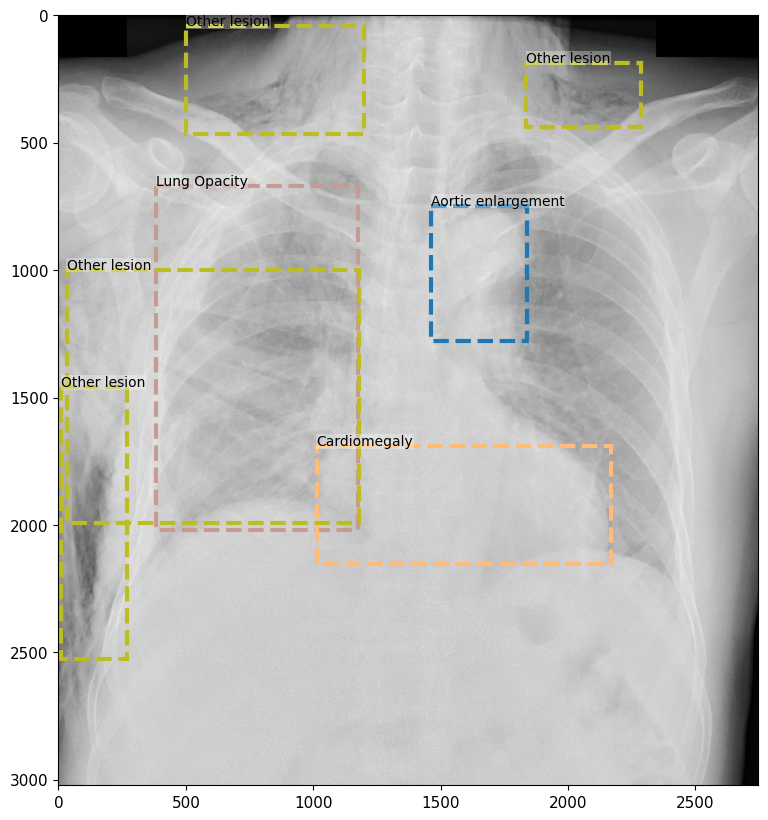

In [58]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_234516_vinbig_yolov8l/',
    num_classes=len(VINBIG_BBOX_NAMES),
    class_names=VINBIG_BBOX_NAMES,
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/cffa67149b86b1359623d25f061a2063.jpg',
    conf_thres=0.1, iou_thres=0.1,
    dataset_name=DATASET_NAMES.VINBIG,
)

Overriding model.yaml nc=80 with nc=22

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

checkpoint_names = ['checkpoint_35_vnbgbbiou+vnbgbbmf1+vnbglauc+vnbgprcauc=0.5644.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_230714_vinbig_yolov8l/checkpoint_35_vnbgbbiou+vnbgbbmf1+vnbglauc+vnbgprcauc=0.5644.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/cffa67149b86b1359623d25f061a2063.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_230714_vinbig_yolov8l/metadata.json
image_transform_kwargs = {'vinbig': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True, 'for_vinbig': True}}
get_image_transform()
  Using bounding box aware transforms


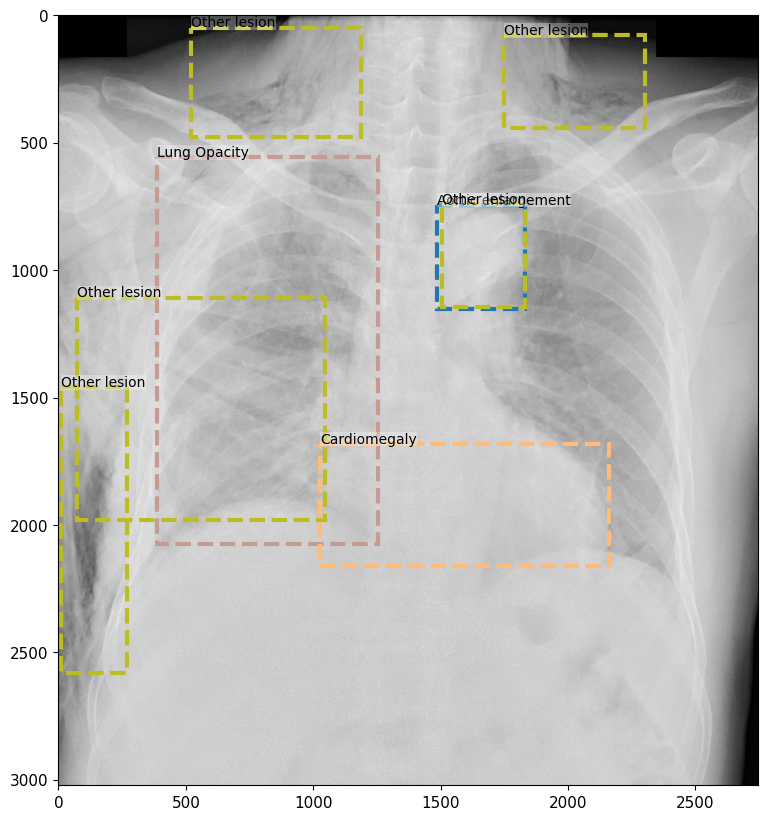

In [59]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_230714_vinbig_yolov8l/',
    num_classes=len(VINBIG_BBOX_NAMES),
    class_names=VINBIG_BBOX_NAMES,
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/cffa67149b86b1359623d25f061a2063.jpg',
    conf_thres=0.1, iou_thres=0.1,
    dataset_name=DATASET_NAMES.VINBIG,
)

Overriding model.yaml nc=80 with nc=22

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

checkpoint_names = ['checkpoint_59_vnbgbbiou+vnbgbbmf1+vnbglauc+vnbgprcauc=0.9276.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_234516_vinbig_yolov8l/checkpoint_59_vnbgbbiou+vnbgbbmf1+vnbglauc+vnbgprcauc=0.9276.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/4f737958fc5a7d9805f4a94f70cfc5a2.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_234516_vinbig_yolov8l/metadata.json
image_transform_kwargs = {'vinbig': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True, 'for_vinbig': True}}
get_image_transform()
  Using bounding box aware transforms


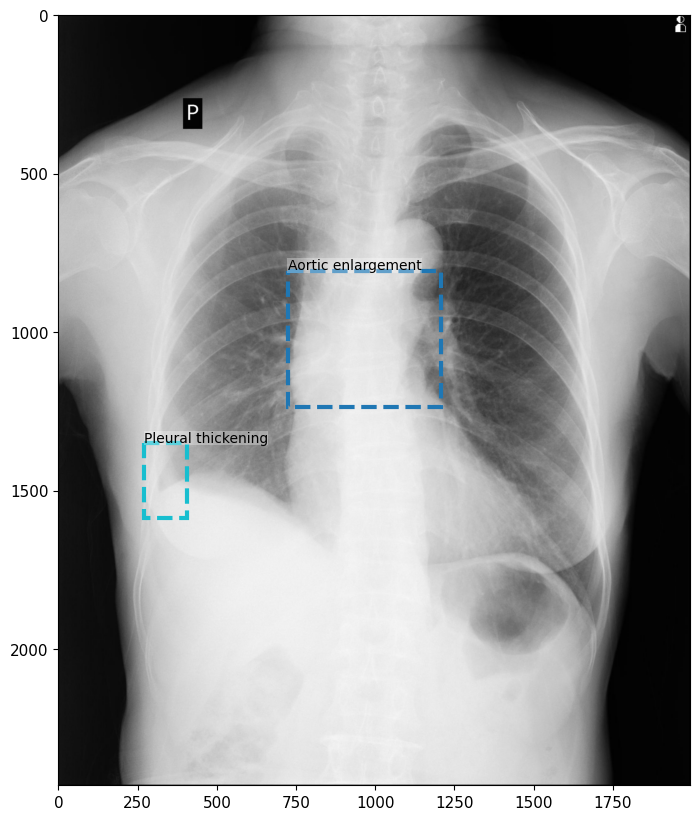

In [61]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_234516_vinbig_yolov8l/',
    num_classes=len(VINBIG_BBOX_NAMES),
    class_names=VINBIG_BBOX_NAMES,
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/4f737958fc5a7d9805f4a94f70cfc5a2.jpg',
    conf_thres=0.1, iou_thres=0.1,
    dataset_name=DATASET_NAMES.VINBIG,
)

Overriding model.yaml nc=80 with nc=22

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytic

checkpoint_names = ['checkpoint_35_vnbgbbiou+vnbgbbmf1+vnbglauc+vnbgprcauc=0.5644.pt']
pretrained_checkpoint_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_230714_vinbig_yolov8l/checkpoint_35_vnbgbbiou+vnbgbbmf1+vnbglauc+vnbgprcauc=0.5644.pt
Checkpoint successfully loaded!
image_path = /mnt/workspace/vinbig-cxr/dataset-jpg/images/4f737958fc5a7d9805f4a94f70cfc5a2.jpg
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_230714_vinbig_yolov8l/metadata.json
image_transform_kwargs = {'vinbig': {'image_size': [416, 416], 'augmentation_mode': None, 'use_clip_transform': False, 'clip_version': None, 'use_huggingface_vitmodel_transform': False, 'huggingface_vitmodel_name': None, 'use_torchxrayvision_transform': False, 'use_bbox_aware_transform': True, 'horizontal_flip_prob': 0, 'use_detectron2_transform': False, 'for_yolov8': True, 'for_vinbig': True}}
get_image_transform()
  Using bounding box aware transforms


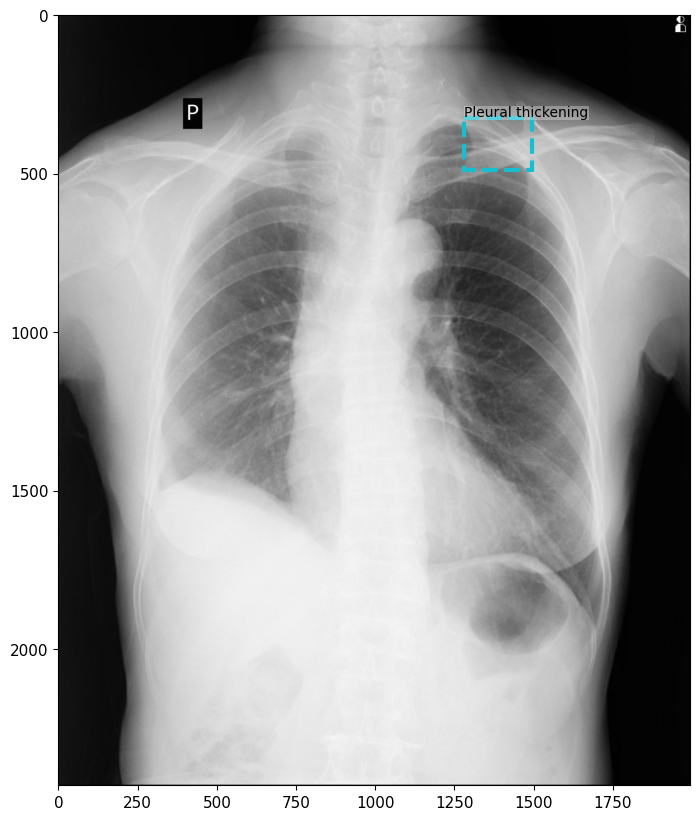

In [60]:
visualize_yolov8_predictions(
    model_name_or_path='yolov8l.pt',
    checkpoint_folder_path='/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230525_230714_vinbig_yolov8l/',
    num_classes=len(VINBIG_BBOX_NAMES),
    class_names=VINBIG_BBOX_NAMES,
#     image_path='/mnt/data/mimic-cxr-jpg/images/p11/p11255133/s50857798/d784c870-cccb726f-ba44b7d4-703efff1-45f36555.jpg',
    image_path='/mnt/workspace/vinbig-cxr/dataset-jpg/images/4f737958fc5a7d9805f4a94f70cfc5a2.jpg',
    conf_thres=0.1, iou_thres=0.1,
    dataset_name=DATASET_NAMES.VINBIG,
)